In [2]:
!pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 3.9 MB/s 
     |████████████████████████████████| 1.8 MB 12.1 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=664dbcc9746ac74b8ab59ad845d99630c8e902db163452a2339005819edeace3
  Stored in directory: /root/.cache/pip/wheels/f3/af/8c/5dd7553522d74c52a7813806fc7ee1a9caa20a3f7c8fd850d5
Successfully built theano-pymc


In [17]:
import pymc3 as pm
import numpy as np
import arviz as az

# wynik testu jest zelżny od rzutu monetą
# jednak w tym teście mamy 2 miejsca które mogą błednie klasyfikowac dane
# test zależy od monety i prawdomówności studentów czy wyrzucili reszkę czy orła
# test też jest skonstruwany w zakresach od 0.25 do 0.75 i wtym zakresie działa

def ex_7(yes):
    yes_count = yes
    with pm.Model() as model:
        p_d = pm.Uniform("p_d", lower=0, upper=1)
        p_observed = pm.Deterministic("p_observed", 0.25 + 0.5 * p_d)
        answers = pm.Binomial("answers", 100, p_observed, observed=yes_count)
        idata = pm.sample(2000, tune=2500)

    az.plot_trace(idata, show=True)

Yes count: 70


/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


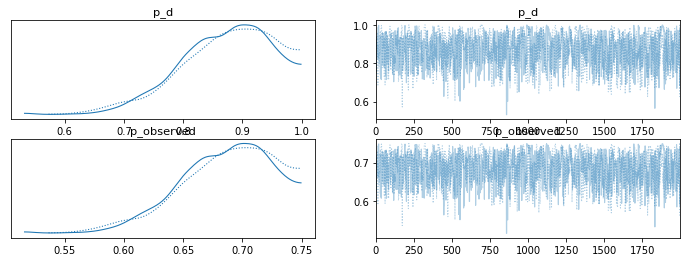

Yes count: 20


/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


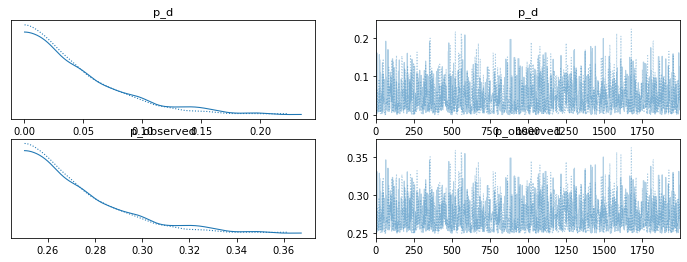

Yes count: 10


/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


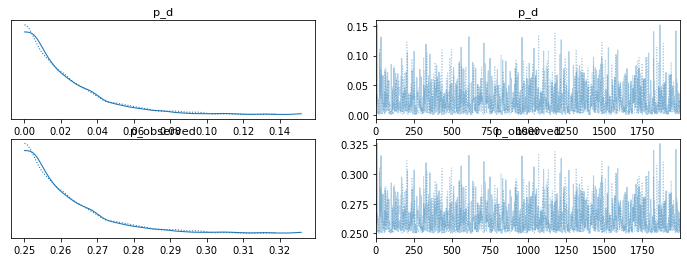

Yes count: 5


/usr/local/lib/python3.7/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.


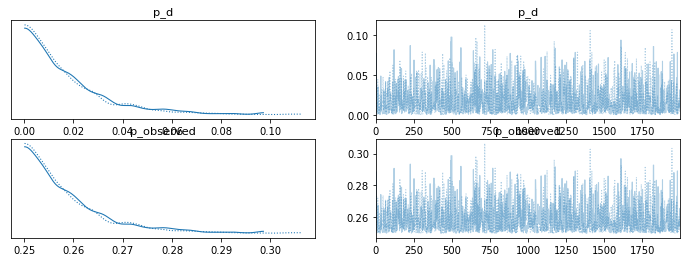

In [18]:
lst = [70, 20, 10, 5]
for i in lst:
  print("Yes count:", i)
  ex_7(i)

In [28]:
from numpy.random import choice

def gen_data(ratio):
    data = choice([0,1], 100, p=[1-ratio, ratio])
    # print("Count of 1:", sum(data))
    return data


data_for_9 = gen_data(0.9)
print("Count of 1:", sum(data_for_9))
data_for_5 = gen_data(0.5)
print("Count of 1:", sum(data_for_5))
data_for_1 = gen_data(0.1)
print("Count of 1:", sum(data_for_1))



Count of 1: 92
Count of 1: 50
Count of 1: 10


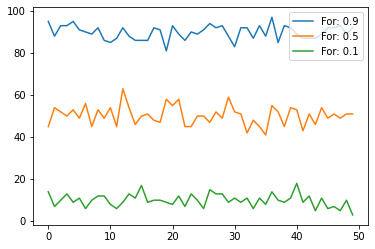

In [36]:
import matplotlib.pyplot as plt


lst = [0.9, 0.5, 0.1]
for i in lst:
    yes = []
    for _ in range(50):
        data = gen_data(i)
        yes.append(sum(data))

    plt.plot(yes, label = "For: " + str(i)) 
    plt.legend()
